In [53]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import pickle
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("D:/Notebooks/Datasets/Bengaluru_House_Data (1).csv")

In [5]:
data.head()

,area_type,availability,location,bedroom,society,total_sqft,bathroom,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [12]:
data['bedroom'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: bedroom, dtype: int64

In [9]:
a = '2 BHK'.split(' ')
int(a[0])

2

In [30]:
data1 = data.drop(['availability','location','society'],axis = 1)

In [31]:
data1.head()

,area_type,bedroom,total_sqft,bathroom,balcony,price
0,Super built-up Area,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,2 BHK,1200,2.0,1.0,51.00


In [32]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label1 = LabelEncoder()
data1['area_type']= label.fit_transform(data1['area_type'])
data1['bedroom']=label1.fit_transform(data1['bedroom'])

In [33]:
data1.isnull().sum()

area_type       0
bedroom         0
total_sqft      0
bathroom       73
balcony       609
price           0
dtype: int64

In [34]:
data1.dropna(inplace= True , axis  = 0)

In [35]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12711 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   12711 non-null  int32  
 1   bedroom     12711 non-null  int32  
 2   total_sqft  12711 non-null  object 
 3   bathroom    12711 non-null  float64
 4   balcony     12711 non-null  float64
 5   price       12711 non-null  float64
dtypes: float64(3), int32(2), object(1)
memory usage: 595.8+ KB


In [44]:
def ranges_to_value(x):
    lstVal = x.split('-')
    if len(lstVal) == 2:
        return(float(lstVal[0])+float(lstVal[1]))/2
    try:
        return float(x)
    except:
        return None

In [45]:
data1['total_sqft'] = data1['total_sqft'].apply(ranges_to_value)

In [48]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12711 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   12711 non-null  int32  
 1   bedroom     12711 non-null  int32  
 2   total_sqft  12669 non-null  float64
 3   bathroom    12711 non-null  float64
 4   balcony     12711 non-null  float64
 5   price       12711 non-null  float64
dtypes: float64(4), int32(2)
memory usage: 595.8 KB


In [50]:
data1.dropna(inplace=True)

In [51]:
data1.corr().round(3)['price']

area_type    -0.061
bedroom       0.353
total_sqft    0.559
bathroom      0.459
balcony       0.120
price         1.000
Name: price, dtype: float64

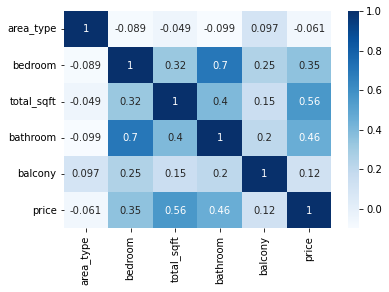

In [56]:
sns.heatmap(data1.corr().round(3),annot=True,cmap='Blues')
plt.show()

In [59]:
Model = Pipeline(steps=[('scaler', StandardScaler()), ('LinearRegression', LinearRegression())])

In [57]:
x = data1.drop(columns=['price','area_type'],inplace = False)


In [60]:
Model.fit(x,data1['price'])

Pipeline(steps=[('scaler', StandardScaler()),
                ('LinearRegression', LinearRegression())])

In [62]:
pred = Model.predict([[1521.0,3.0,1.0,3]])

C:\Users\sanja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [63]:
pred

array([967.05558541])

In [64]:
with open('beguluru_pricing.pk', 'wb') as fin:
  pickle.dump(Model, fin)